In [1]:
# Fahmi Idris Saputra (2103623)
# Pendidikan Ilmu Komputer - A


# Sistem Persamaan Linear dengan metode Gaussian


# library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# menentukan fungsi gaussian mencari SPL Ax = b
# A = sebagai nilai koefisen matriks
# B = sebagai nilai vektor sisi kanan

# fungsi ini akan mengembalikan nilai X dari sistem persamaan linear Ax = b

def gaussian_elimination(A, b):

    # tambahkan matriks koefisien vektor sisi kanan
    # ubah nilai a menjadi float
    A = A.astype(float)
    
    # perbesar koefisien matriks dengan vektor ruas kanan
    M = np.hstack((A, b.reshape(-1, 1)))
    
    # perhitungan gauss menggunakan pivot
    for pivot_row in range(M.shape[0]):
        # pilih pivot element
        pivot = M[pivot_row][pivot_row]
        
        # normalisasikan baris pada pivot
        M[pivot_row] /= pivot
        
        # eliminasi nilai kolom pada pivot yang ada di dalam baris yang lain
        for row in range(M.shape[0]):
            if row != pivot_row:
                M[row] -= M[row][pivot_row] * M[pivot_row]
    
    # cari solusi persamaan SPL dengan membuat matriks kosong yang akan diisi dari hasil persamaan SPL
    x = np.empty(M.shape[0])
    # melakukan pengisian matriks untuk setiap baris 
    for row in range(M.shape[0] - 1, -1, -1):
        x[row] = M[row][-1]
        # melakukan interasi pengisian matriks pada kolom
        for col in range(row + 1, M.shape[0]):
            x[row] -= M[row][col] * x[col]

    return x

Solution: [ 2.  3. -1.]


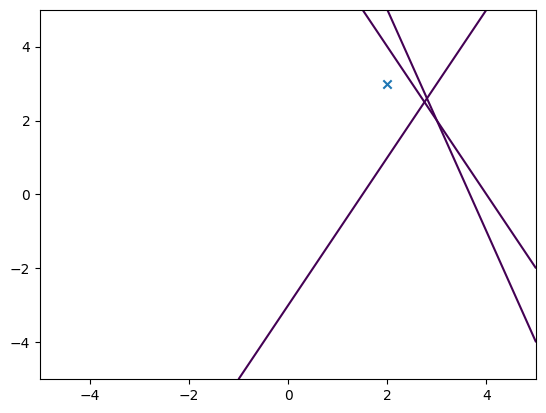

In [3]:
# menentuan koefisien matriks dan vektor sisi kanan
# matrix A
A = np.array([[2, 1, -1], [-3, -1, 2], [-2, 1, 2]])

# matrix B
b = np.array([8, -11, -3])

# panggil function gaussian_elimination kemudian nilai return akan disimpan di dalam matriks x
x = gaussian_elimination(A, b)

print(f"Solution: {x}")

# plot solusinya
fig, ax = plt.subplots()
x1, x2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
ax.contour(x1, x2, x1 * 2 + x2 - 8, levels=[0])
ax.contour(x1, x2, -x1 * 3 - x2 + 11, levels=[0])
ax.contour(x1, x2, -x1 * 2 + x2 + 3, levels=[0])
ax.scatter(x[0], x[1], marker='x')
plt.show()